# Analysis of Proportional Only Controller

## Learning Objectives

In this notebook, we will use a mathematical model for the TCLab to design and analyze a P-only controller.

After studying this notebook and completing the activities, you will be able to:
* Agument dynamic system model with proportional (P) feedback control law to predict closed loop dynamics
* Analyze stability of a linear (or linearized) system
* Perform senstivity analysis to tune controller


In [1]:
# Set default parameters for publication quality plots
import matplotlib.pyplot as plt
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=3)

## Mathematical Model

Recall the following second order model for the heater and sensor:

\begin{align}
C^H_p\frac{dT_{H,1}}{dt} & = U_a(T_{amb} - T_{H,1}) + U_b(T_{S,1} - T_{H,1}) + \alpha P_1 u_1\\
C^S_p\frac{dT_{S,1}}{dt} & = U_b(T_{H,1} - T_{S,1}) 
\end{align}

where $T_{H,1}$ is the heater temperature, $T_{S,1}$ is the sensor temperature, and $T_{amb}$ is the ambient temperature (all in °C). We previously estimated the following:
* $U_a = 0.0261 \pm 0.0001$ (Watt/°C) is the heat transfer coefficient between the heater and ambient environment
* $U_b = 0.0222 \pm 0.0045$ (Watt/°C) is the heat transfer coefficient between the heater and sensor
* $C_{p}^{H} = 1.335 \pm 0.215$ (J/°C) is the heat capacity of the heater
* $C_{p}^{S} = 1.328 \pm 0.051$ (J/°C) is the heat capacity of the sensor
* $\alpha = 0.00016 $ (Watt / a.u. / \%) is the heat delivered, this is a conversion factor
* $P_1 = 200$ (a.u.) is the maximum power of the heater
* $u_1 \in [0,100]$ (\%) is the control signal

Everyone has their own TCLab hardware which due to manufacturing variability (e.g., different batches of parts, different amount of thermal paste) will have slightly different dynamics. You can adapt this notebook to analyze your TCLab hardware using your estimates for $U_a$, $U_b$, $C_{p}^H$, and $C_p^{S}$ from [Lab 2](../../assignments/Lab-2-Model-Identification.ipynb).

## Steady State Control Signal

Let $T_{set}$ be the set point (target) temperature.

What control signal $\bar{u}_1$ is required to maintain the steady state $\bar{T}_{H,1} = T_{set}$? We start by making the substitution and setting the time derivatives to zero:

\begin{align}
0 & = U_a(T_{amb} - T_{set}) + U_b(\bar{T}_{S,1} - T_{set}) + \alpha P_1 \bar{u}_{1}\\
0 & = U_b(T_{set} - \bar{T}_{S,1}) 
\end{align}

From the second equation, we see $\bar{T}_{S,1} = T_{set}$, which makes sense. Let's substitute this expression into the first equation and rearrange:

\begin{equation}
\bar{u}_1 = \frac{ - U_a(T_{amb} - T_{set})}{\alpha P_1}
\end{equation}

## Proportional Control Law

We will consider the proporational control law (position form):

\begin{equation}
u_{1}(t) = \bar{u}_{1} + K_P (T_{set}(t)-T_{S,1}(t)) = \bar{u}_{1} + K_P e(t)
\end{equation}

Here, $K_P > 0$ is the proportional gain and $e(t) = T_{set}(t) - T_{S,1}(t)$ is the tracking error. If the temperature of the sensor is less than the set point, i.e., $T_{S,1} < T_{set}$, then the control signal is greater than the heat input required to maintain steady state, i.e., $u_{1} > \bar{u}_{1}$.

**Central question:** How can we tune $K_p$? How does our choice of $K_p$ impact the closed loop dynamics of the system?

## Closed-Loop Dynamics

### Deviation Temperature Defined Relative to the Setpoint

For convience, let's define the temperatures as differences with repect to the set point:

\begin{align}
T^*_{H,1} &= T_{H,1} - T_{set} \\
T^*_{S,1} &= T_{S,1} - T_{set} \\
T^*_{amb} &= T_{amb} - T_{set}
\end{align}

We can now rewrite our dynamic model in terms of these temperatures. If we ignore changes in the set point, i.e., assume $T_{set}$ is a constant, then $\frac{dT_i}{dt} = \frac{dT^{*}_i}{dt}$ where subscript $i$ is short hand for the subscripts $_{H,1}$, $_{S,1}$ and $_{amb}$. Likewise, our model also has temperature differences, such as

\begin{equation}
T_{amb} - T_{H,1} = (T_{amb} - T_{set}) - (T_{H,1} - T_{set}) = T^*_{amb} - T^*_{H,1}
\end{equation}

Putting this all together gives:

\begin{align}
C^H_p\frac{dT^*_{H,1}}{dt} & = U_a(T^*_{amb} - T^*_{H,1}) + U_b(T^*_{S,1} - T^*_{H,1}) + \alpha P_1 u_1\\
C^S_p\frac{dT^*_{S,1}}{dt} & = U_b(T^*_{H,1} - T^*_{S,1}) 
\end{align}


Let's write the steady state control signal in terms of the offset temperature:

\begin{equation}
\bar{u}_1 = \frac{ - U_a(T_{amb} - T_{set})}{\alpha P_1} = \frac{ - U_a T^*_{amb}}{\alpha P_1}
\end{equation}

Likewise, we will write the tracking error with the offset temperature:

\begin{equation}
e(t) = T_{set}(t) - T_{S,1}(t) = -T^{*}_{S,1}(t)
\end{equation}

Next, we subsitute our control law into the first differential equation of the TCLab model:

\begin{align}
C^H_p\frac{dT^*_{H,1}}{dt} &= U_a(T^*_{amb} - T^*_{H,1}) + U_b(T^*_{S,1} - T^*_{H,1}) + \alpha P_1 \left(\bar{u}_{1} - K_p T^*_{S,1} \right) \\
&= U_a(T^*_{amb} - T^*_{H,1}) + U_b(T^*_{S,1} - T^*_{H,1}) - U_a T^*_{amb} - \alpha P_1 K_p T^*_{S,1}
\end{align}









Notice the $T^{*}_{amb}$ terms cancel!

We are left with the following system of differential equations:

$$
\begin{align}
C^H_p\frac{dT^*_{H,1}}{dt} & = -U_a T^*_{H,1} + U_b(T^*_{S,1} - T^*_{H,1}) - \alpha P_1 K_p T^*_{S,1}\\
C^S_p\frac{dT^*_{S,1}}{dt} & = U_b(T^*_{H,1} - T^*_{S,1}) 
\end{align}
$$

Let's collect similar terms:

$$
\begin{align}
\frac{dT^*_{H,1}}{dt} & = \left(-\frac{U_a + U_b}{C^H_p} \right)  T^*_{H,1} + \left(\frac{U_b - \alpha P_1 K_p}{C_p^H} \right) T^*_{S,1} \\
\frac{dT^*_{S,1}}{dt} & = \left(\frac{U_b}{C_p^S} \right) T^*_{H,1} + \left(-\frac{U_b}{C_p^S} \right) T^*_{S,1} 
\end{align}
$$

Finally, we can write this as a linear differential equation in matrix form:

\begin{align}
\frac{d}{dt}\underbrace{\begin{bmatrix} T^*_{H,1} \\ T^*_{S,1} \end{bmatrix}}_\mathbf{x} & = 
\underbrace{\begin{bmatrix} -\frac{U_a+U_b}{C^H_p} & \frac{U_b - \alpha P_1 K_p}{C^H_p} \\ \frac{U_b}{C^S_p} & - \frac{U_b}{C^S_p}\end{bmatrix}}_\mathbf{A} 
\underbrace{\begin{bmatrix} T^*_{H,1} \\ T^*_{S,1} \end{bmatrix}}_\mathbf{x} \\
\\
\underbrace{\begin{bmatrix} T^*_{S,1}\end{bmatrix}}_\mathbf{y} & = 
\underbrace{\begin{bmatrix}0 & 1 \end{bmatrix}}_\mathbf{C} 
\underbrace{\begin{bmatrix} T^*_{H,1} \\ T^*_{S,1} \end{bmatrix}}_\mathbf{x}
\end{align}

This system describes the closed loop dynamics. Take a few minutes to compare to the model for [open loop dynamics](../2/Second-Order.ipynb). Notice the above model does not include $u$ or $\mathbf{B}$ because the control law is embedded in the closed loop model.


### Deviation Temperature Defined Relative to the Ambient Temperature

Alternatively, we can rewrite the model using $T_{amb}$ for the deviation variable and treating the setpoint $T_{set}$ as the input control signal. We will also ignore the offset $\bar{u}_1$.

\begin{align}
T^*_{H,1} &= T_{H,1} - T_{amb} \\
T^*_{S,1} &= T_{S,1} - T_{amb} \\
T^*_{amb} &= T_{amb} - T_{amb}
\end{align}

Putting this all together gives:

\begin{align}
C^H_p\frac{dT^*_{H,1}}{dt} & = - U_a T^*_{H,1} + U_b(T^*_{S,1} - T^*_{H,1}) + \alpha P_1 u_1\\
C^S_p\frac{dT^*_{S,1}}{dt} & = U_b(T^*_{H,1} - T^*_{S,1}) 
\end{align}

Next, let's substitute the control law,

\begin{equation}
u_1 = K_p (T^*_{set} - T^*_{S} )
\end{equation}

which gives the following:

\begin{align}
C^H_p\frac{dT^*_{H,1}}{dt} & = - U_a T^*_{H,1} + U_b(T^*_{S,1} - T^*_{H,1}) + \alpha P_1 K_p (T^*_{set} - T^*_{S} )\\
C^S_p\frac{dT^*_{S,1}}{dt} & = U_b(T^*_{H,1} - T^*_{S,1}) 
\end{align}

Finally, we can write this in matrix form:

\begin{align}
\frac{d}{dt}\underbrace{\begin{bmatrix} T^*_{H,1} \\ T^*_{S,1} \end{bmatrix}}_\mathbf{x} & = 
\underbrace{\begin{bmatrix} -\frac{U_a+U_b}{C^H_p} & \frac{U_b - \alpha P_1 K_p}{C^H_p} \\ \frac{U_b}{C^S_p} & - \frac{U_b}{C^S_p}\end{bmatrix}}_\mathbf{A} 
\underbrace{\begin{bmatrix} T^*_{H,1} \\ T^*_{S,1} \end{bmatrix}}_\mathbf{x} + \underbrace{\begin{bmatrix} \frac{- \alpha P_1 K_P}{C_p^H} \\ 0 \end{bmatrix}}_{\mathbf{B}} \underbrace{\begin{bmatrix} T^*_{set} \end{bmatrix}}_{\mathbf{u}} \\
\\
\underbrace{\begin{bmatrix} T^*_{S,1}\end{bmatrix}}_\mathbf{y} & = 
\underbrace{\begin{bmatrix}0 & 1 \end{bmatrix}}_\mathbf{C} 
\underbrace{\begin{bmatrix} T^*_{H,1} \\ T^*_{S,1} \end{bmatrix}}_\mathbf{x}
\end{align}

Notice we have the same $\mathbf{A}$ matrix. This is important because we will analyze the eigenvalues of $\mathbf{A}$ to determine the stability of the controller.

## Numeric Simulation

Let's simulate the above system two ways to verify our math is correct.

### Original Model: Open Loop

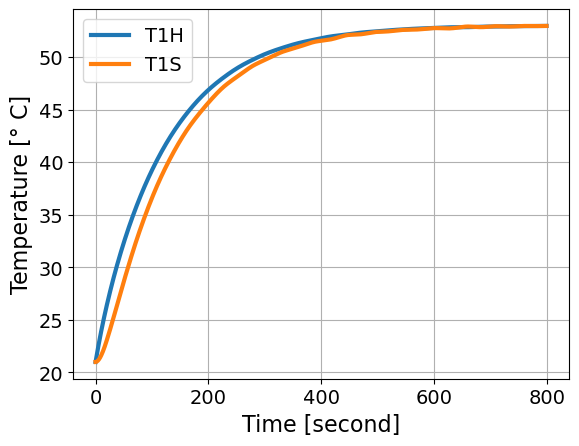

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# parameters
T_amb = 21 # deg C
alpha = 0.00016 # watts / (units P1 * percent U1)
P1 = 200 # P1 units (arbitrary units)
U1 = 50 # steady state value of u1 (percent), used for step test
T_set = 40 # setpoint (deg C)

# fitted parameters (see previous lab) for hardware
'''
Ua = 0.0261 # watts/deg C
Ub = 0.0222 # watts/deg C
CpH = 1.335 # joules/deg C
CpS = 1.328 # joules/deg C
'''

# fitted parameters (repeat Lab 3) for TCLab digital twin
Ua = 0.05 # watts/deg C
Ub = 0.05 # watts/deg C
CpH = 5.0 # joules/deg C
CpS = 1.0 # joules/deg C

t_final = 800
t_step = 1
t_expt = np.arange(0,t_final,t_step)

# model solution
def deriv(t, y):
    # right hand side of differential equation
    T1H, T1S = y
    dT1H = (-(Ua + Ub)*T1H + Ub*T1S + alpha*P1*U1 + Ua*T_amb)/CpH
    dT1S = Ub*(T1H - T1S)/CpS
    return [dT1H, dT1S]

# numerical integrate
soln_original = solve_ivp(deriv, [min(t_expt), max(t_expt)], [T_amb, T_amb], t_eval=t_expt)

# plot
plt.plot(soln_original.t, soln_original.y[0],label='T1H')
plt.plot(soln_original.t, soln_original.y[1],label='T1S')
plt.legend()
plt.xlabel('Time [second]')
plt.ylabel('Temperature [° C]')
plt.grid()
plt.show()

Compare this plot to our model identification lab. This is a simulation of a step response.

### New Model: Open Loop

Now let's simulate the new model. We'll set $K_p = 0$ to turn off the controller (no gain).

This assumes u_bar = 29.6875 %


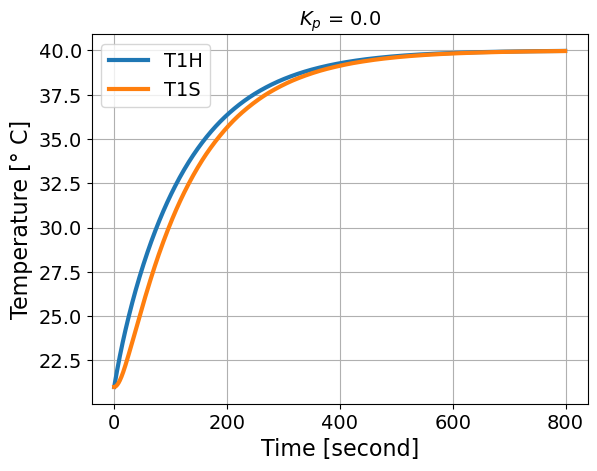

In [3]:
def simulate_response(Kp=0.0):
    """ Simulate the dynamic response of the system to a step change 
    using proportional control with gain Kp.
    
    Arguments:
        Kp: the proportional control gain

    Returns:
        None

    Actions:
        Plots the response of the system
    
    """


    print("This assumes u_bar =",Ua*(T_set - T_amb)/alpha/P1,"%")

    A = np.array([[-(Ua + Ub)/CpH, (Ub - alpha*P1*Kp)/CpH], 
                [Ub/CpS, -Ub/CpS]])


    # model solution
    def closed_loop(t, y):
        return A @ y
    soln_P = solve_ivp(closed_loop, [min(t_expt), max(t_expt)], [T_amb - T_set, T_amb-T_set], t_eval=t_expt)

    plt.plot(soln_P.t, soln_P.y[0] + T_set,label='T1H')
    plt.plot(soln_P.t, soln_P.y[1] + T_set,label='T1S')
    plt.title("$K_p$ = "+str(Kp))
    plt.grid()
    plt.legend()
    plt.xlabel('Time [second]')
    plt.ylabel('Temperature [° C]')
    plt.show()

simulate_response(Kp=0.0)

Question: Why does our simulation approach $T_{set}$?

Answer: We used $T_{set}$ to calculate $\bar{u}$. This was important to get the $T_{amb}$ terms to cancel in the derivation above.

### New Model: Closed Loop (Continous)

Now let's look at the closed loop response for a few different Kp values.

This assumes u_bar = 29.6875 %


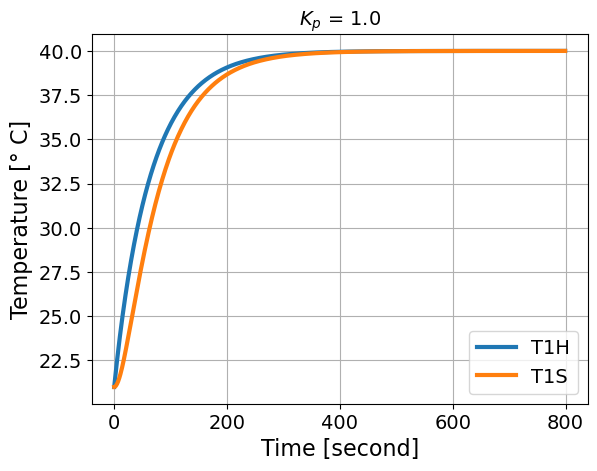

In [4]:
simulate_response(Kp=1.0)

This assumes u_bar = 29.6875 %


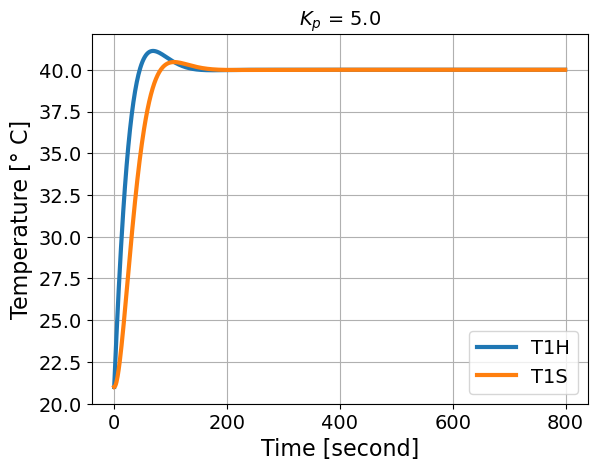

In [5]:
simulate_response(Kp=5.0)

Perform a simple sensitivity analysis and answer the following discussion questions:
* What happens with small and large $K_p$ values? Does the solution overshoot or undershoot? How long does it take to reach the set point?
* Can you find the value of $K_p$ that is the transition between overshoot and undershoot?

### Digital Control (Discrete Model)

Next, let's simulate the same response, but instead using the discrete dynamical system.

In [6]:
from scipy.signal import cont2discrete

def continuous_system(Kp):
    ''' Continous system for TCLab with P control

    Arguments:
        Kp: the proportional control gain

    Returns:
        A, B, C, D: the state space matrices

    '''

    A = np.array([[-(Ua + Ub)/CpH, (Ub - alpha*P1*Kp)/CpH], 
                [Ub/CpS, -Ub/CpS]])

    B = np.array([[alpha*P1*Kp/CpH], [0]])

    C = np.array([[0, 1]])

    D = np.array([[0]])

    return A, B, C, D

def discrete_system(Kp):
    ''' Discrete system for TCLab with P control

    Arguments:
        Kp: the proportional control gain

    Returns:
        Ad, Bd, Cd, Dd: the state space matrices

    Notes:
        The time step is assumed to be 1 second

    '''
    A, B, C, D = continuous_system(Kp)

    d_system = cont2discrete((A, B, C, D), 1, method='zoh')

    # Extract the discrete time A and B matrices
    Ad = d_system[0]
    Bd = d_system[1]
    Cd = d_system[2]
    Dd = d_system[3]

    return Ad, Bd, Cd, Dd

Ad, Bd, Cd, Dd = discrete_system(Kp=1.0)
print("Ad=\n",Ad)
print("Bd=\n",Bd)
print("Cd=\n",Cd)
print("Dd=\n",Dd)

Ad=
 [[0.98028602 0.00347641]
 [0.04828353 0.9513159 ]]
Bd=
 [[0.00633661]
 [0.00015632]]
Cd=
 [[0 1]]
Dd=
 [[0]]


Next, let's consider the system responding to a setpoint starting at 5C above ambient and then increasing to 430C above ambient at 100 seconds.

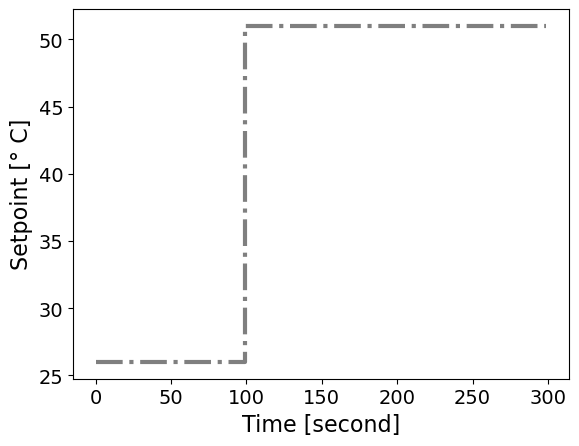

In [7]:
t = np.arange(0, 300, 1)
T_set = np.ones(t.shape)*5
T_set[100:] = 30

plt.step(t, T_set + T_amb, linestyle='-.', color='black', alpha=0.5)
plt.xlabel('Time [second]')
plt.ylabel('Setpoint [° C]')
plt.show()


Next, let's simulate the response of the continous system.

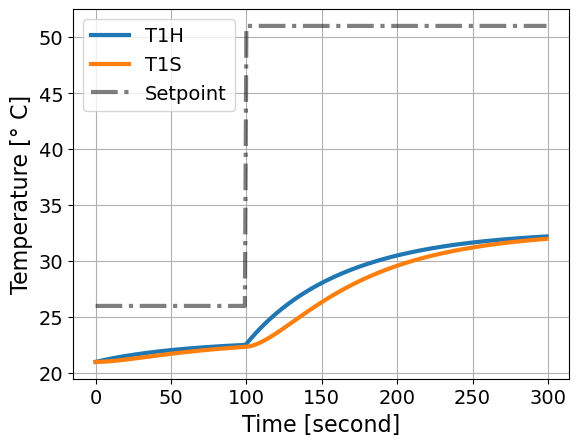

In [8]:
from scipy.signal import lsim, lti

def simulate_response_continous(Kp=1.0):

    c_system = lti(*continuous_system(Kp))

    T, yout, xout = lsim(c_system, T_set, t, X0=[0, 0])

    plt.plot(t, xout[:,0] + T_amb, label='T1H')
    plt.plot(t, xout[:,1] + T_amb, label='T1S')
    plt.plot(t, T_set + T_amb, label='Setpoint', linestyle='-.', color='black', alpha=0.5)
    plt.xlabel('Time [second]')
    plt.ylabel('Temperature [° C]')
    plt.grid()
    plt.legend()
    plt.show()

simulate_response_continous(Kp=1.0)

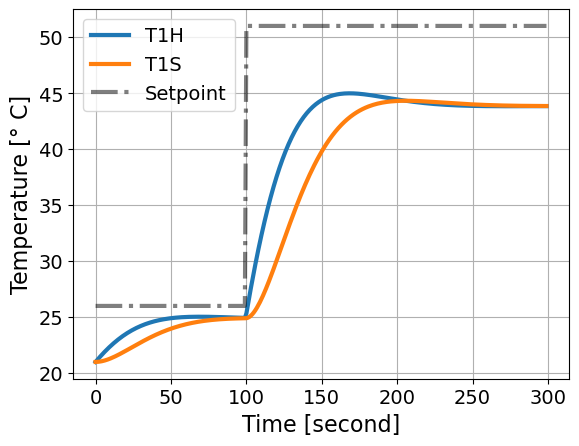

In [9]:
simulate_response_continous(Kp=5.0)

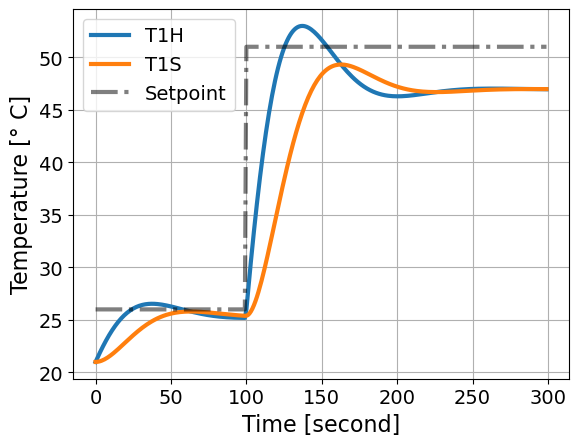

In [10]:
simulate_response_continous(Kp=10.0)

Next, let's simulate the discrete time system.

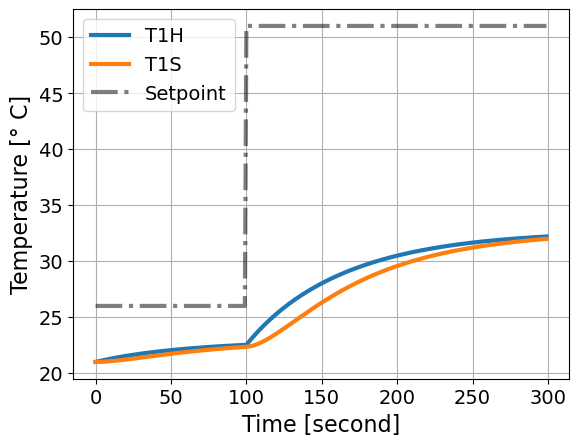

In [11]:
from scipy.signal import dlti, dlsim

def simulate_response_discrete(Kp=1.0):

    d_system = dlti(*discrete_system(Kp=Kp))

    T, yout, xout = dlsim(d_system, T_set, t)

    plt.plot(t, xout[:,0] + T_amb, label='T1H')
    plt.plot(t, xout[:,1] + T_amb, label='T1S')
    plt.plot(t, T_set + T_amb, label='Setpoint', linestyle='-.', color='black', alpha=0.5)
    plt.xlabel('Time [second]')
    plt.ylabel('Temperature [° C]')
    plt.grid()
    plt.legend()
    plt.show()

simulate_response_discrete(Kp=1.0)

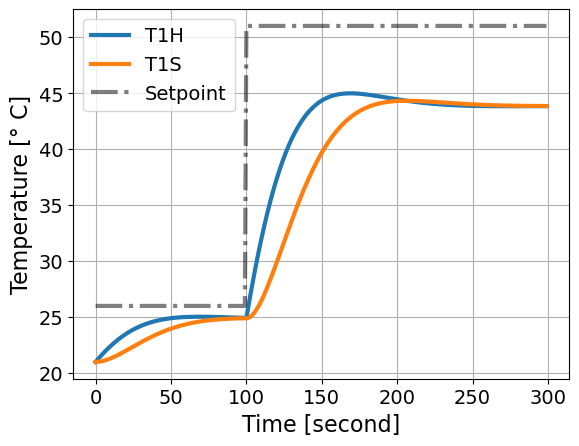

In [12]:
simulate_response_discrete(Kp=5.0)

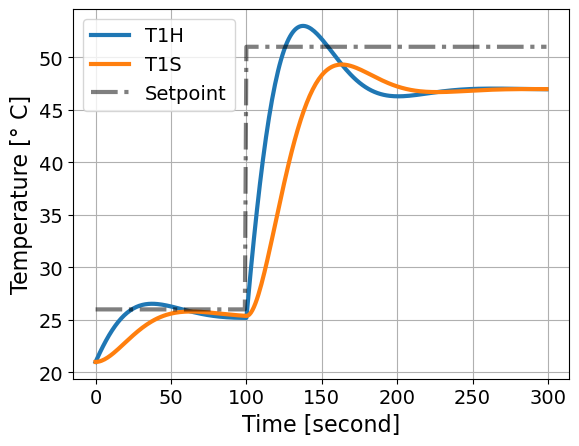

In [13]:
simulate_response_discrete(Kp=10.0)

Finally, we can simulate the response using the difference equation and implementing the control logic ourselves.

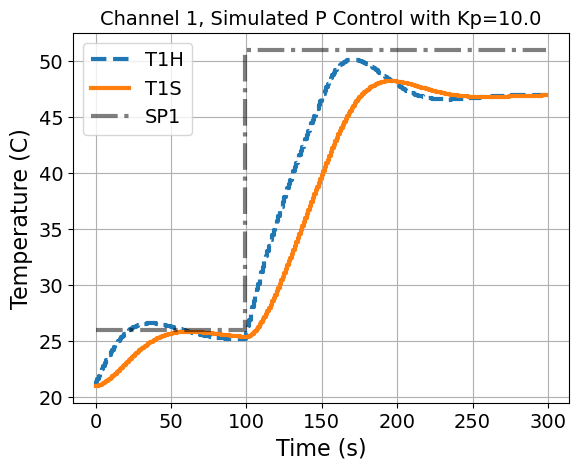

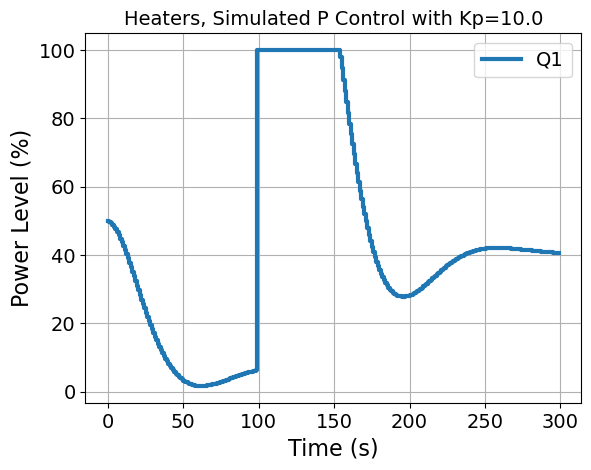

,T1H,T1S,Time,Q1,SP1
0,21.000000,21.000000,0,50.000000,26.0
1,21.316847,21.007816,1,49.921838,26.0
2,21.627078,21.030540,2,49.694598,26.0
3,21.930020,21.067106,3,49.328943,26.0
4,22.225073,21.116467,4,48.835326,26.0
...,...,...,...,...,...
295,46.990295,46.927220,295,40.727802,51.0
296,46.990433,46.930299,296,40.697007,51.0
297,46.990404,46.933231,297,40.667688,51.0
298,46.990217,46.936015,298,40.639852,51.0


In [14]:
import pandas as pd


def tclab_simulate_P(Kp = 1.0, verbose=False, plot=True):
    ''' Simulate the TCLab system with P control
    Arguments:
        Kp: the proportional control gain
        verbose: print matrices, default is False
        plot: create plots, default is True

    Returns:
        data: DataFrame with columns for Time, T1, T2, Q1, Q2
    '''

    n = len(t)

    assert len(T_set) == n, 'Setpoint array must have the same length as time array'

    # Original open loop state space model
    A = np.array([[-(Ua + Ub)/CpH, Ub/CpH], [Ub/CpS, -Ub/CpS]])
    B = np.array([[alpha*P1/CpH], [0]])
    C = np.array([[0, 1]])
    D = np.array([[0]])

    Ad, Bd, Cd, Dd, dt = cont2discrete((A, B, C, D), dt=1, method='zoh')

    # Initialize state matrix
    X = np.zeros((n, 2))

    # Initialize input matrix
    U = np.zeros((n, 1))


    # Loop over time steps
    for i in range(n):
        # Current state
        x = X[i, :]

        # Unpack into individual states
        T1H, T1S = x


        # Temperature control
        # Channel 1
        # Hint: Write code below to set U[i,0]
        # Look at the equations you wrote down for the relay controller
        U[i, 0] = Kp*(T_set[i] - T1S)

        # Saturation
        U[i,0] = np.clip(U[i,0], 0, 100)

        # Update state
        if i < n-1:
            # Do not update the state for the last time step
            # We want to update U and SP for plotting
            X[i + 1, :] = Ad @ x + Bd @ U[i, :]


    # Shift states from deviation variables to absolute values
    X += T_amb

    # Create DataFrame
    data = pd.DataFrame(X, columns=['T1H', 'T1S'])
    data['Time'] = t
    data['Q1'] = U[:, 0]
    data['SP1'] = T_set + T_amb

    if plot:
        plt.title('Channel 1, Simulated P Control with Kp={}'.format(Kp))
        plt.step(data['Time'], data['T1H'], label='T1H', linestyle='--')
        plt.step(data['Time'], data['T1S'], label='T1S', linestyle='-')
        plt.step(data['Time'], data['SP1'], label='SP1', linestyle='-.', color='black', alpha=0.5)
        plt.ylabel('Temperature (C)')
        plt.xlabel('Time (s)')
        plt.legend()
        plt.grid()
        plt.show()
        

        plt.title('Heaters, Simulated P Control with Kp={}'.format(Kp))
        plt.step(data['Time'], data['Q1'], label='Q1')
        plt.xlabel('Time (s)')
        plt.ylabel('Power Level (%)')
        plt.legend()
        plt.grid()
        plt.show()

    return data

tclab_simulate_P(Kp=10.0)

## Stability Analysis: Numerical (Continuous)

We will now perform a more sophisticated analysis to understand how the choice of $K_P$ impacts the closed loop dynamics. Specifcally, we'll inspect the eigenvalues of $\mathbf{A}$.

In [15]:
# Eigendecomposition analysis
from scipy.linalg import eig

def calc_eig(Kp,verbose=True):

    A = np.array([[-(Ua + Ub)/CpH, (Ub - alpha*P1*Kp)/CpH], 
              [Ub/CpS, -Ub/CpS]])
    
    w, vl = eig(A)

    if verbose:
        for i in range(len(w)):
            print("Eigenvalue",i,"=",w[i])
            print("Eigenvector",i,"=",vl[:,i],"\n")

    return w

calc_eig(Kp=0.1)

Eigenvalue 0 = (-0.008675106837823632+0j)
Eigenvector 0 = [0.63706969 0.77080621] 

Eigenvalue 1 = (-0.06132489316217637+0j)
Eigenvector 1 = [-0.22090244  0.97529591] 



array([-0.00867511+0.j, -0.06132489+0.j])

In [16]:
calc_eig(Kp=10.0)

Eigenvalue 0 = (-0.034999999999999996+0.04974937185533099j)
Eigenvector 0 = [0.72057669+0.j         0.20016019-0.66385626j] 

Eigenvalue 1 = (-0.034999999999999996-0.04974937185533099j)
Eigenvector 1 = [0.72057669-0.j         0.20016019+0.66385626j] 



array([-0.035+0.04974937j, -0.035-0.04974937j])

Here are rules for interpretting the eigenvalues and eigenvectors:
* If all of the real components of the eigenvalues are negative, the system is stable and will return to the steady state ($T^*_{S,1} \rightarrow 0$, $T^*_{H,1} \rightarrow 0$).
* The eigenvectors corresponding to any eigenvalues with a positive real component shows the direction of exponential growth.
* If any of the eigenvalues have non-zero imaginary components, the system osciallates.

Let's perform a sensitivity analysis to see how the eigenvalues change.

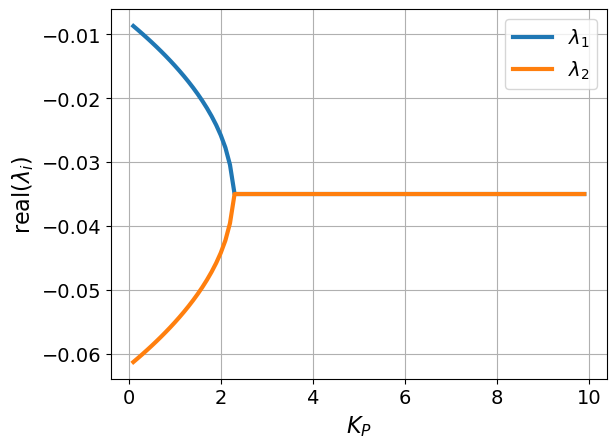

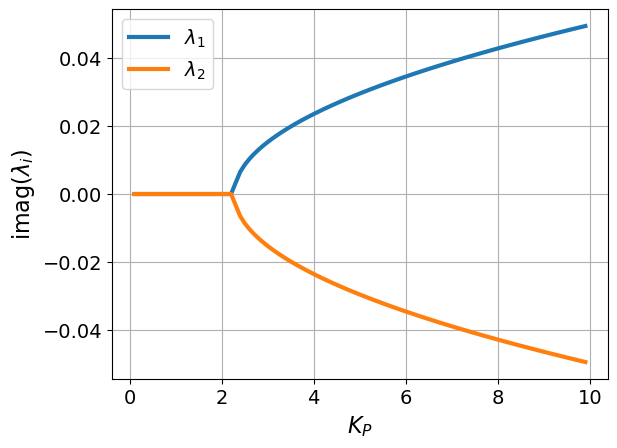

In [17]:
Kp_range = np.arange(0.1,10,0.1)
n = len(Kp_range)
eig_values = np.zeros((n,2), dtype=complex)

for i,kp in enumerate(Kp_range):
    eig_values[i,:] = calc_eig(kp, verbose=False)[:]

plt.figure()
plt.plot(Kp_range, np.real(eig_values))
plt.xlabel("$K_P$")
plt.ylabel("real($\lambda_i$)")
plt.legend(['$\lambda_1$','$\lambda_2$'])
plt.grid()
plt.show()

plt.figure()
plt.plot(Kp_range, np.imag(eig_values))
plt.xlabel("$K_P$")
plt.ylabel("imag($\lambda_i$)")
plt.legend(['$\lambda_1$','$\lambda_2$'])
plt.grid()
plt.show()

Interpret the plots above to find the value of $K_p$ that is the transition from undershooting (no oscillations) and overshooting (with oscillations).

In [18]:
### BEGIN SOLUTION
calc_eig(2.3, verbose=True)
### END SOLUTION

Eigenvalue 0 = (-0.035+0.0033166247903554j)
Eigenvector 0 = [0.28676967+0.06340716j 0.95589889+0.j        ] 

Eigenvalue 1 = (-0.035-0.0033166247903554j)
Eigenvector 1 = [0.28676967-0.06340716j 0.95589889-0.j        ] 



array([-0.035+0.00331662j, -0.035-0.00331662j])

## Stability Analysis: Analytical (Continuous)

Finally, let's calculate the eigenvalues analytically. Recall, eigenvalues $\lambda$ and eigenvectors $\mathbf{v}$ of $\mathbf{A}$ satisfy:

\begin{equation}
\mathbf{A} \mathbf{v} = \lambda \mathbf{v}
\end{equation}

We can calculate the eigenvalues $\lambda$ using the determinant.

\begin{equation}
\det \left(\mathbf{A} - \lambda \mathbf{I} \right) = \det \left(\begin{bmatrix} -\frac{U_a+U_b}{C^H_p} -\lambda & \frac{U_b - \alpha P_1 K_p}{C^H_p} \\ \frac{U_b}{C^S_p} & - \frac{U_b}{C^S_p} - \lambda\end{bmatrix}\right)
\end{equation}

This gives the characteristic equation:

\begin{equation}
\left(\frac{U_a+U_b}{C^H_p} + \lambda \right) \left( \frac{U_b}{C^S_p} + \lambda\right) - \left(\frac{U_b - \alpha P_1 K_p}{C^H_p} \right) \left( \frac{U_b}{C^S_p} \right) = 0
\end{equation}

Multiplying both sides by $C_p^H~C_p^S$ gives:

\begin{equation}
\left(U_a+U_b + C_p^H \lambda \right) \left( U_b + C^S_p \lambda \right) - \left(U_b - \alpha P_1 K_p \right) \left( U_b \right) = 0
\end{equation}

Finally, algebriac manipulation give:

\begin{equation}
\underbrace{C_p^H C_p^S}_{a} \lambda^2 + \underbrace{\left(C_p^H U_b + (U_a + U_b) C_p^S \right)}_{b} \lambda + \underbrace{\left(U_a + \alpha P_1 K_p \right) U_b}_{c} = 0
\end{equation}

Recall the quadratic formula:

\begin{equation}
\lambda = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2a}
\end{equation}

**Is the controller always stable?**

In order for the controller to be unstable, $\mathrm{Real}(\lambda_i) > 0$ for at least one of the eigenvalues. This can only happen if

$$
\begin{align}
-b &< \sqrt{b^2 - 4 a c} \\
b^2 &< b^2 - 4 ac \\
0 &< -4ac \\
0 &> 4 a c
\end{align}
$$

However, $a>0$ and $c>0$ because $Cp^S$, $Cp^H$, $U_a$, $U_b$, $\alpha$, $P_a$, $K_P > 0$. Thus, $0 > 4 a c$ is not possible and the controller is stable for all choices of $K_P$ (ignoring changes in setpoint).



**When does the controller oscillate?**

The closed-loop system oscillates if $\mathrm{Imag}(\lambda) \neq 0$ for at least two eigenvalues. This occurs when

$$
\begin{align}
4 a c &> b^2 \\
4 C_p^H C_p^S \left(U_a + \alpha P_1 K_P \right) U_b &> \left(C_p^H U_b + (U_a + U_b) C_p^S \right)^2 \\
K_p &> \frac{\left(C_p^H U_b + (U_a + U_b) C_p^S \right)^2}{4 C_p^H C_p^S U_b \alpha P_1 } - \frac{U_a}{\alpha P_1}
\end{align}
$$

In [19]:
K_p_critical = (CpH*Ub + (Ua + Ub)*CpS)**2/(4*CpH*CpS*Ub*alpha*P1) - Ua/(alpha*P1)
print("Critical K_p = ",round(K_p_critical,3))

Critical K_p =  2.266


## Stability Analysis: Numerical (Discrete)

Next, we will analyze the eigenvalues of the discrete system.

In [20]:
def calc_eig_d(Kp,verbose=True):
    ''' Calculate the eigenvalues of the discrete system

    Arguments:
        Kp: the proportional control gain
        verbose: print eigenvalues and eigenvectors, default is True

    Returns:
        w: the eigenvalues of the discrete system

    '''

    Ad, Bd, Cd, Dd = discrete_system(Kp)
    
    w, vl = eig(Ad)

    if verbose:
        for i in range(len(w)):
            print("Eigenvalue",i,"=",w[i])
            print("Eigenvector",i,"=",vl[:,i],"\n")

    return w

calc_eig_d(Kp=0.1)

Eigenvalue 0 = (0.9913624133259671+0j)
Eigenvector 0 = [0.63706969 0.77080621] 

Eigenvalue 1 = (0.940517622387778+0j)
Eigenvector 1 = [-0.22090244  0.97529591] 



array([0.99136241+0.j, 0.94051762+0.j])

How do we determine the stability of the system? We need to confirm both eigenvalues are within the unit circle.

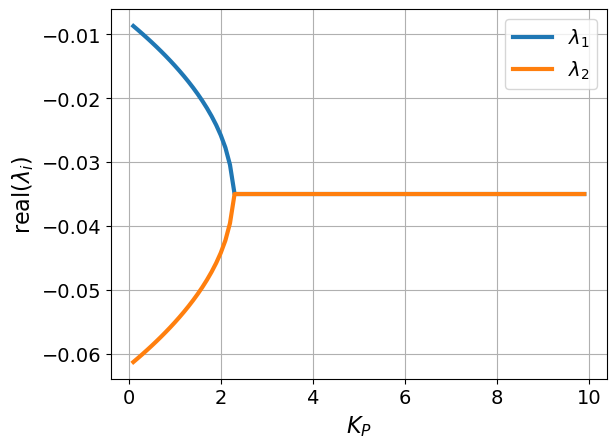

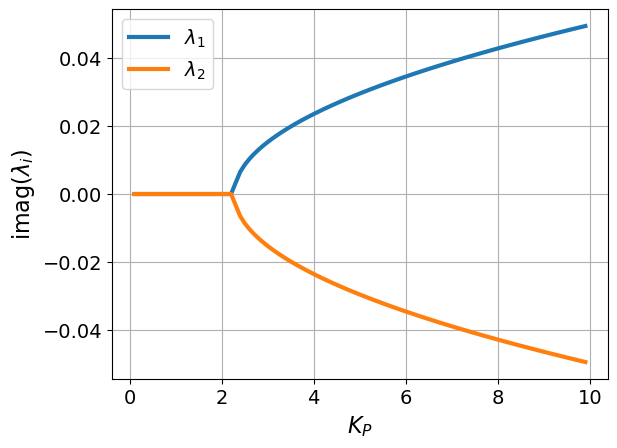

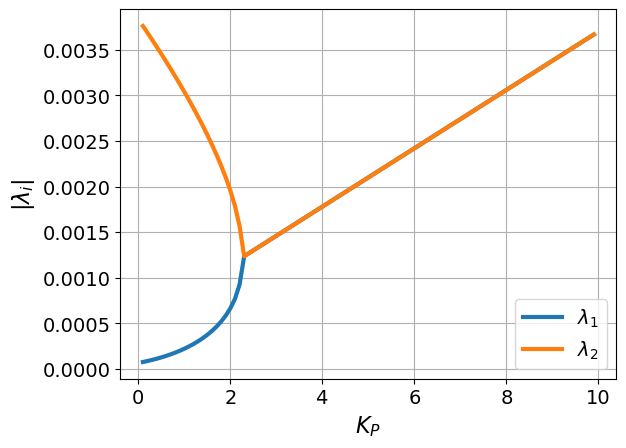

In [21]:
Kp_range = np.arange(0.1,10,0.1)
n = len(Kp_range)
eig_values_d = np.zeros((n,2), dtype=complex)

for i,kp in enumerate(Kp_range):
    eig_values_d[i,:] = calc_eig(kp, verbose=False)[:]

plt.figure()
plt.plot(Kp_range, np.real(eig_values_d))
plt.xlabel("$K_P$")
plt.ylabel("real($\lambda_i$)")
plt.legend(['$\lambda_1$','$\lambda_2$'])
plt.grid()
plt.show()

plt.figure()
plt.plot(Kp_range, np.imag(eig_values_d))
plt.xlabel("$K_P$")
plt.ylabel("imag($\lambda_i$)")
plt.legend(['$\lambda_1$','$\lambda_2$'])
plt.grid()
plt.show()

plt.figure()
# Calculate the complex absolute values of the eigenvalues
plt.plot(Kp_range, np.real(eig_values_d)**2 + np.imag(eig_values_d)**2)
plt.xlabel("$K_P$")
plt.ylabel("$|\lambda_i|$")
plt.legend(['$\lambda_1$','$\lambda_2$'])
plt.grid()
plt.show()

## Simulate Performance with TC Lab

In [22]:
%matplotlib inline
from tclab import setup, clock, Historian, Plotter

def simulate_P_only(Kp=1.9, SP=50, tfinal=600, t_step=1):
    """ Simulate proportional only controller using TCLab 'digital twin' mode
    Arguments:
        Kp: proportional gain (%/degC)
        SP: setpoint (degC)
        tfinal: simulation time (seconds)
        t_step: time step (seconds)
        MV_bar: steady-state value for manipulated variable (%)
    """

    def P_only(Kp, MV_bar):
        """ Basic proportional only controller

        Arguments:
            Kp: proportional gain
            MV_bar: steady-state value for manipulated variable

        """
        # Minimum and maximum bounds for manipulated variables
        MV_min = 0
        MV_max = 100

        # Initialize with MV_bar
        MV = MV_bar

        while True:
            SP, PV, MV = yield MV
            e = PV - SP # calculate error
            MV = MV_bar - Kp*e # apply control law
            MV = max(MV_min, min(MV_max, MV)) # Apply upper and lower bounds



    # Initialize in simulation mode
    TCLab = setup(connected=False, speedup = 20)

    u_star = Ua*(SP-T_amb) / (alpha*P1) # u at steady-state
    print("MV_bar =",u_star)

    # create control loop
    controller1 = P_only(Kp, MV_bar=u_star)
    controller1.send(None)

    with TCLab() as lab:
        # Create historican and plotter
        h = Historian(lab.sources)
        p = Plotter(h, tfinal)

        # initialize maximum power for heater 1
        lab.P1 = P1


        # Loop over the time steps
        for t in clock(tfinal, t_step):
            # measure the the process variable (sense)
            PV = lab.T1

            # get manipulated variable (sense)                                    
            MV = lab.U1

            # P control to determine the MV (compute)                                    
            MV = controller1.send([SP, PV, MV])

            # set the heater power (actuate)             
            lab.Q1(MV)

            # log data                                      
            p.update()

    plt.show()

### Small $K_p$

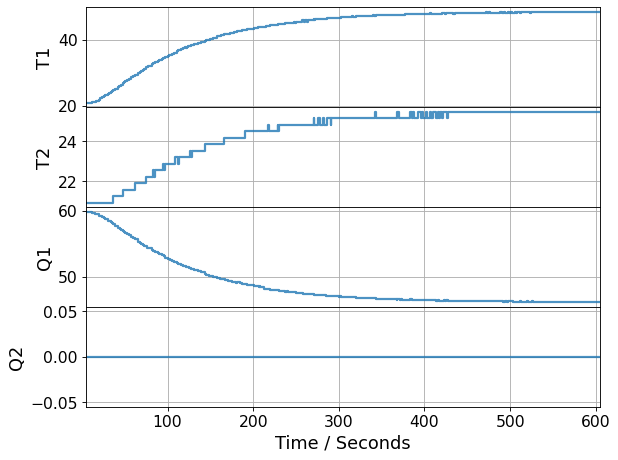

TCLab Model disconnected successfully.


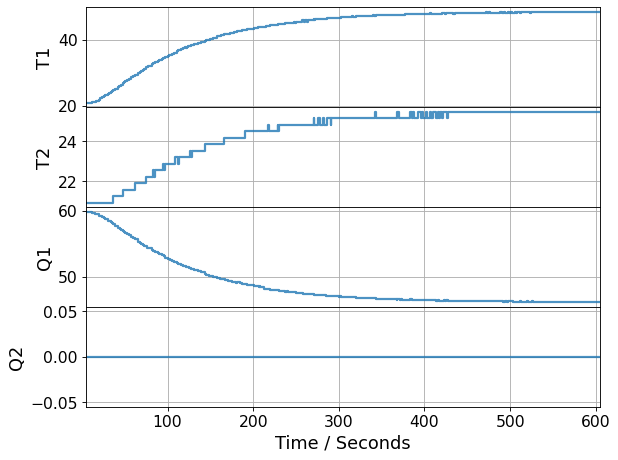

In [23]:
simulate_P_only(Kp=0.5)

### Moderate $K_P$ 

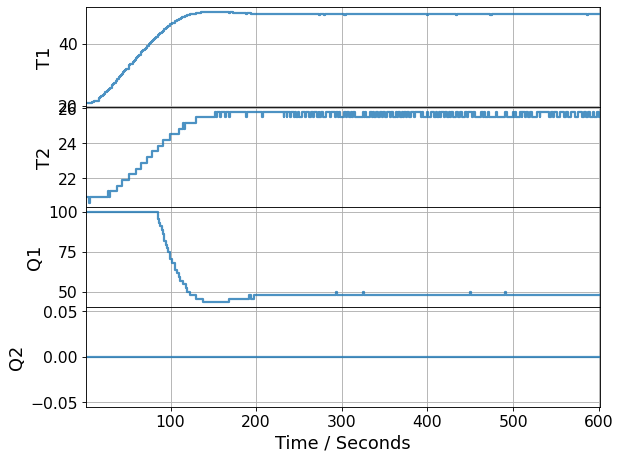

TCLab Model disconnected successfully.


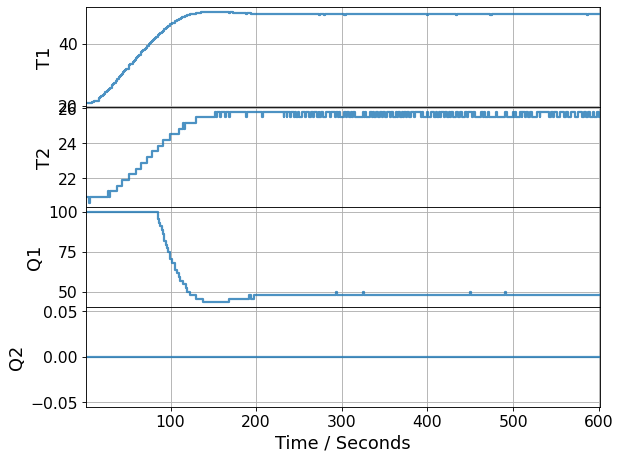

In [24]:
simulate_P_only(Kp=7)

### Large $K_P$

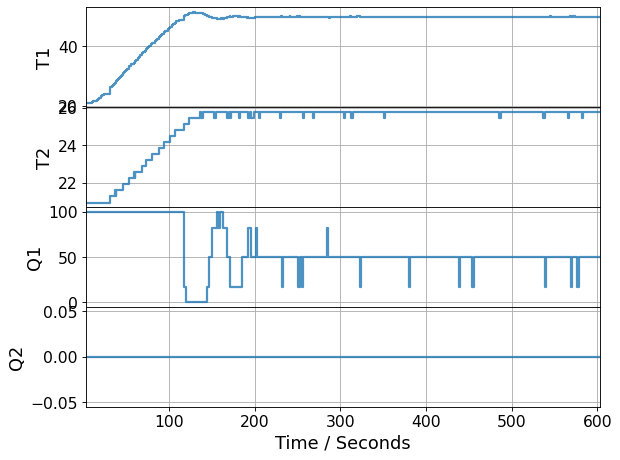

TCLab Model disconnected successfully.


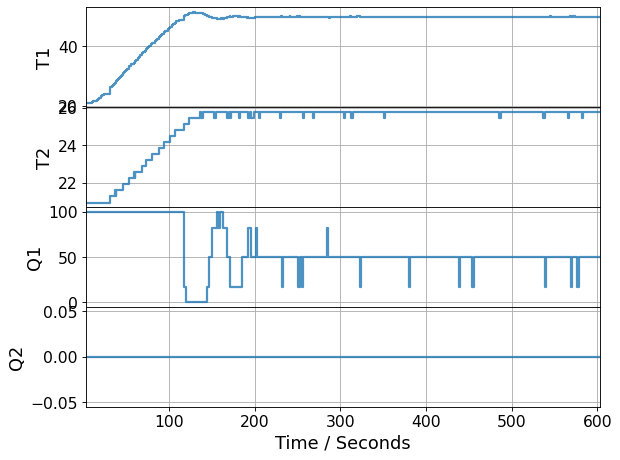

In [25]:
simulate_P_only(Kp=100.0)

### Discussion:
- Were the responses overdamped or underdamped?
- Did the system reach the setpoint?
- Did the results match the mathematical analysis? If not, why?